# Introduction - test

The goal of this notebook is to use data to understand the relationship between square footage of a dwelling and the dwelling's price.  The type of data you plan on using heavily influences the type of algorithm that's available to use. Additionally, it's usually a good idea to visualize the data before making any decision about what kind of algorithm to use.

First, let's import the necessary modules and then read in the data.

## Imports

In [ ]:
# For manipulating data
import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt

# For constructing the model
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# For evaluating model performance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import r_regression

# Read Data

In [ ]:
# Load the data set.  Use the CSV's first column as the dataframe's index
df = pd.read_csv("../data/housing_data.csv", index_col=0)

# Check data loaded correctly
df.head()

,sq_ft (in hundreds),price (in thousands)
0,11.77,217.21
1,15.39,256.29
2,16.89,275.05
3,9.09,137.80
4,13.46,234.13


In [ ]:
# Store label names for x and y
x_label = 'sq_ft (in hundreds)'
y_label = 'price (in thousands)'

# Store other names for later to evaluate
# the accuracy of the model
y_true = 'true_price (in thousands)'
y_predicted = 'predicted_price (in thousands)'

## Visualizing the Data

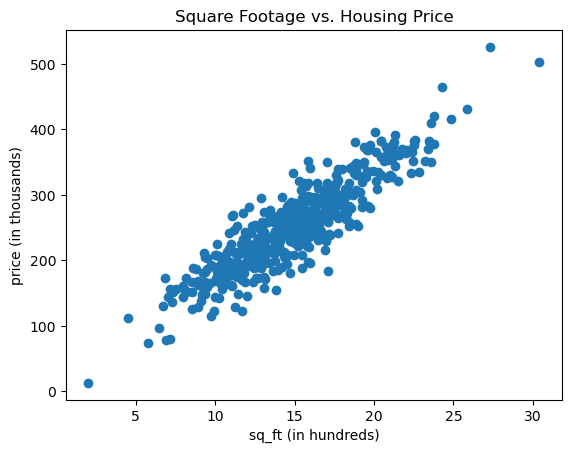

In [ ]:
# Create figure and axis for graphing
fig, ax = plt.subplots(1, 1)

# Scatter plot of housing data
ax.scatter(x=df[x_label], y=df[y_label])
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Square Footage vs. Housing Price');

After visualizing the data, we no longer have to speculate about whether a relationship exists within our dataset; it's clear there's some kind of relationship between the square footage of a dwelling and its price.  More specifically, as the square footage of a dwelling goes up, the price of that dwelling tends to go up as well.

# Why Linear Regression?

Whenever a relationship in the data exists, regression is one common statistical tools that's available to help understand it.  Furthermore, regression can also be used to make predictions about unseen data, for instance predicting the price of a new dwelling based on it's square footage.  

Since it stands to reason that there's a relationship between the square footage of a property and its value, regression is probably a good choice.  However, the type of regression one choses to use depends on several factors.  

Linear regression is able to use any number of qualitative or quantitative inputs to predict a quantitative output.  **It can only predict a quantitative output**.  Because our goal is to predict the price of a dwelling, which is quantitative, linear regression can be used.  

**Note**: Using qualitative inputs involves a little more effort than quantitative inputs.  Also, using more than one input, whether qualitative or quantitative, adds complexity.  This notebook will first consider the simplest case of linear regression, when there's a single quantitative input, which in this case will be the square footage of a dwelling.  However, sections will be added to the notebook later to discuss how to deal with these situations.

Secondly, linear regression is most suited when the relationship between your inputs and outputs is...well, linear.  The scatter plot shows most of the points are clumped together in a linear fashion.  In other words, one could draw a line through the "center" of the points and most of the points would be pretty close to that line.  

In situations like these, where the data shows a linear pattern and when one wants to predict a single qualitative output, linear regression is appropriate.  From a mathematical standpoint, there are several more conditions to check before linear regression can be considered statistically sound enough for use, but these are beyond the scope of this notebook.

# Generate Training and Testing Data

While not true in all circumstances, the goal of many ML algorithms is to use the algorithm on new and unseen data at some point.  For this reason, it's important to test the algorithm on unseen data in order to verify its performance and whether or not it will be worthwhile to use.  

This leaves two options:
* Option 1: Build the model now and wait for a sufficient amount of new data to come in, which can be used to verify the model's accuracy.
* Option 2: Parition the dataset into a training set and a testing set.  The training set can be used to build the model and the testing set will only be used to verify the accuracy.

Some may be concerned that by partioning your dataset and then only using part of it to build the model might negatively affect its performance.  After all, it's reasonable to think that the more data points you have the better off it will be, yet in truth there tend to be diminishing returns.  As it turns out, as long as your dataset is sufficiently large, performing a train/test split will still yield quite good results.  Given the alternative is waiting, a train/test split approach is preferred because it will allow you to determine performance immmediately and tweaks to the model can be implemented quickly, if need be.

In [ ]:
# Split dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df[[x_label]].values,
                                                    df[[y_label]].values,
                                                    test_size=0.25,
                                                    random_state=42)

# Training the Linear Regression Model

In the case of using a single input (x) to predict a qualitative output (y), the model will look like your friendly linear function from algebra class in high school: $$y=m \cdot x+b$$

However, because most datasets are incomplete, it's unlikely one will ever have enough information to create a linear model that's the most accurate representation of your data.  Without complete data, you won't know what the slope or the y-intercept should be.  That being said, the goal isn't to go for exactness or perfection, but opt for estimation instead, which is why the model is more commonly written in this form: $$\hat y = \beta_1 \cdot x + \beta_0$$

where $\hat y$ represents the **predicted** output and $\beta_1$ and $\beta_0$ represent the **estimated** slope and **estimated** y-intercept, respectively.  

In [ ]:
# Create linear regression object
lin_reg_model = linear_model.LinearRegression()

# Train the model using the training dataset
lin_reg_model = lin_reg_model.fit(X_train, y_train)

# The slope
beta_1 = lin_reg_model.coef_[0][0]
print(f"Estimated Slope: {beta_1:.2f}")

# The y-intercept
beta_0 = lin_reg_model.intercept_[0]
print(f"Estimated y-intercept: {beta_0:.2f}")

Estimated Slope: 15.51
Estimated y-intercept: 21.21


Based on the training data, the model has estimated the slope and y-intercept.  Using the values from above, the model will look like: $$\hat y = 15.51x + 21.21$$

The positive slope indicates a positive relationship between x (sq_ft in hundreds) and y (price in thousands).  This was observed earlier in the scatter plot when it was noted that as the square footage of a dwelling increased, the price of that dwelling tended to increase too.  

In linear regression, the slope means that for every increase in one unit of x will increase y by an amount equal to the slope.  For this example, a slope of 15.51 means when the sq_ft is increased by 1 (hundred), the price increases by 15.51 (thousand).  

The y-intercept tells you what the predicted y-value is when x is 0.  In this case, the y-intercept predicts that when the square footage of a dwelling is 0 (hundred), the price is estimated to be 21.21 (thousand).

# Evaluating model performance

## Training Data

### Making Predictions

Now that the model has been trained, it can be used to make predictions.

In [ ]:
# Make predictions using the already seen training data
training_predictions = lin_reg_model.predict(X_train)
training_predictions = np.round(training_predictions, 2)

# Store results in dataframe
train_results_df = pd.DataFrame({x_label:X_train.flatten(),
                                y_true:y_train.flatten(),
                                y_predicted:training_predictions.flatten()})
train_results_df.head()

,sq_ft (in hundreds),true_price (in thousands),predicted_price (in thousands)
0,14.56,284.14,246.99
1,14.35,212.83,243.73
2,10.76,196.28,188.06
3,9.72,114.36,171.93
4,15.60,276.73,263.11


Remembering the linear model from earlier, the train_results_df from above can be explained.  For the first entry, $\text{sq_ft}=14.56$ hundred.  Plugging this value into the model would look as follows:

$$\hat y = 15.51x + 21.21$$

$$\hat y = 15.51(14.56) + 21.21$$

$$\hat y = 246.99$$

The result is the predicted price of 246.99 thousand, however the true price was $y=284.14$ thousand.  Doing this for every sq_ft value in the dataset leads to many $(x, \hat y)$ pairs, the sq_ft and a *predicted* price, which can then be graphed and compared to the $(x, y)$ pairs from the dataset itself, representing the sq_ft in hundreds and the *true* price in thousands.

### Visualizing the Linear Model's Fit

In the graph below, each point on the red line represents the $(x, \hat y)$ pairs  containing the predicted prices, while the blue dots represent the $(x, y)$ pairs have the actual prices.  

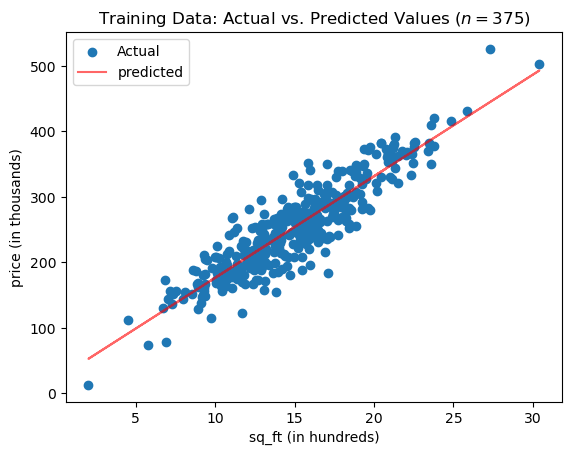

In [ ]:
# Number of sample data points in training data
train_sample_size = X_train.shape[0]

# Create figure and axis for graphing
fig, ax = plt.subplots(1, 1)

# Scatter plot of training data
ax.scatter(x=X_train, y=y_train, label='Actual')

# Linear model's trend line
ax.plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)

ax.set_title(f'Training Data: Actual vs. Predicted Values ($n={train_sample_size})$')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend();

The scatter plot now shows the regression line and it fits the dataset reasonably well.  Most of the points are clumped around that line.  

### Evaluating the strength of the relationship

The r-value, or correlation coefficient, represents the strength of the relationship between x and y.  Positive values represent a positive relationship, where an increase in x produces an increase in y, while negative values represent a negative relationship, where an increase in x represents a decrease in y.

The r-value also helps determine the "strength" of the relationship.  By design, r-values range from -1 to +1, with stronger values closer to -1 or +1 and weaker values closer to 0.

In [ ]:
# The r-value (correlation coefficient)
train_r_value = r_regression(X_train, y_train.flatten())[0]
print(f"r-value (correlation coefficient): {train_r_value:.4f}")

r-value (correlation coefficient): 0.9019


In the training data, the r-value of 0.9019 indicates a strong positive correlation between x and y.

### Checking Error

With the linear regression model built and trained, it's time to start evaluating the model's performance.  First, performance should be evaluated on the training data.  Using the predictions from earlier, the residuals can be calculated, which represent the difference between the true y value and the predicted y value: $$\text{residual} = y - \hat y$$

This calculation yields the error in each prediction and is a way to evaluate the
performance of the model.  

In [ ]:
# Calculate the error (residual) for each prediction
training_residuals = y_train - training_predictions

# Store results in dataframe
train_results_df = pd.DataFrame({x_label:X_train.flatten(),
                                y_true:y_train.flatten(),
                                y_predicted:training_predictions.flatten(),
                                'residual':training_residuals.flatten()})
train_results_df.head()

,sq_ft (in hundreds),true_price (in thousands),predicted_price (in thousands),residual
0,14.56,284.14,246.99,37.15
1,14.35,212.83,243.73,-30.90
2,10.76,196.28,188.06,8.22
3,9.72,114.36,171.93,-57.57
4,15.60,276.73,263.11,13.62


Earlier, we plugged in $\text{sq_ft}=14.56$ hundred to the model and it returned $\hat y = 246.99$ thousand, the predicted price, however the true price was 284.14 thousand.  To determine the error in the prediction, calculate the residual as follows:

$$\text{residual} = y - \hat y$$

$$\text{residual} = 284.14	 - 246.99$$

$$\text{residual} = 37.15$$

When $\text{sq_ft}=14.56$ thousand, the residual indicates the error in the prediction was 37.15 thousand.  Essentially, the true price was 37.15 thousand above the prediction, or in other words, the model under predicted by 37.15 thousand.

### Performance metrics

The root mean squared (RMSE) error represents the average amount of error in a prediction, therefore the lower the RMSE, the lower the error.  

The r2_score, otherwise known as the coefficient of determination, represents the percent of variation in y that is predictable by x. A value closer to 1 (100%) indicates that the model is using x to makes perfect predictions about y because x is the only piece of information needed to understand y.  On the other hand, a value of 0 (0%) indicates x has no relationship with y.  In this case, x is meaningless in regards to understanding or predicting y.  A linear model between x and y would be useless since x and y have no relationship that can be used to make predictions.

In [ ]:
# The root mean squared error
training_rmse = np.sqrt(mean_squared_error(y_train, training_predictions))
print(f"Root mean squared error: {training_rmse:.2f}")

# The r2_score, otherwise known as the coefficient of determination
training_r2_score = lin_reg_model.score(X_train, y_train)
print(f"r2 score (coefficient of determination): {training_r2_score*100:.2f}%")

Root mean squared error: 29.96
r2 score (coefficient of determination): 81.33%


On average, the model has an error of about 29.96 thousand when make a prediction about a dwelling's price in the training data.

Because the relationship between x and y in the training data is strong, sq_ft explains a large chunk (81.33%) of the changes seen in price.

### Visualizing the Linear Model's fit with Residuals

In addition to recreating the same graph from earlier showing the $(x, y)$ pairs of actual data values and the $(x, \hat y)$ pairs of predicted values, we can also create a scatter plot to visualize the residuals. The second graph shows the residuals and the focus should be around the line $y=0$, the line representing a residual of 0, or an error of 0 in the prediction.  The closer each residual is to that line, the less error in the prediction.

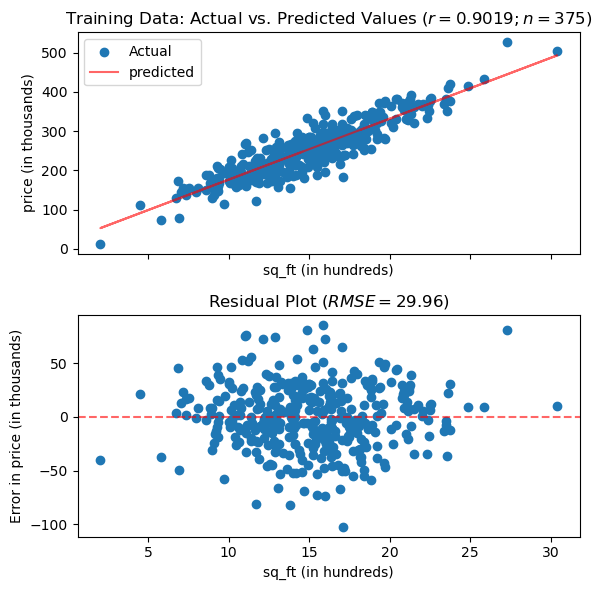

In [ ]:
# Create figure and axis for graphing
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))

# First axis - Scatter plot of training data
ax[0].scatter(X_train, y_train, label='Actual')

# First axis - Linear model's trend line
ax[0].plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)

ax[0].set_title(f'Training Data: Actual vs. Predicted Values ($r={train_r_value:.4f}; n={train_sample_size})$')
ax[0].set_xlabel(x_label)
ax[0].set_ylabel(y_label)
ax[0].legend()

# Second axis - Scatter plot of training residuals
ax[1].scatter(X_train, training_residuals, label='Actual')

# Second axis - Horizontal lines representing zero residual
ax[1].axhline(0, color='r', linestyle='--', alpha=0.6)

# # Second axis - Horizontal lines representing the RMSE
# ax[1].axhline(-training_rmse, alpha=0.4)
# ax[1].axhline(training_rmse, alpha=0.4)

ax[1].set_xlabel(x_label)
ax[1].set_ylabel(f'Error in {y_label}')
ax[1].set_title(f'Residual Plot ($RMSE={training_rmse:.2f})$')

plt.tight_layout()

Remember from earlier that a positive residual meant the model made an underprediction, therefore it stands to reason that a negative residual would be an overprediction.  Focusing on the residual plot, there are roughly an equal amount of residuals above 0 as there are below 0, so the model is making about as many underpredictions as it makes overpredictions.

## Testing Data

The next step is to evaluate performance on testing data.  The performance here is far more important that before, because the goal of the model is to have good performance on new and unseen data.

### Evaluating the strength of the relationship

In [ ]:
# The r-value (correlation coefficient)
test_r_value = r_regression(X_test, y_test.flatten())[0]
print(f"training r-value (correlation coefficient): {train_r_value:.4f}")
print(f"testing r-value (correlation coefficient): {test_r_value:.4f}")

training r-value (correlation coefficient): 0.9019
testing r-value (correlation coefficient): 0.8968


Like in the training dataset, the testing dataset also shows a strong positive relationship between sq_ft and price.

### Making Predictions and Checking Error

This time, the model will make predictions on testing data and then the residuals can be calculated.

In [ ]:
# Make predictions using the "unseen" testing data
test_predictions = lin_reg_model.predict(X_test)
test_predictions = np.round(test_predictions, 2)

# Calculate the error (residual) for each prediction
test_residuals = y_test - test_predictions

# Store results in dataframe
test_results_df = pd.DataFrame({x_label:X_test.flatten(),
                                y_true:y_test.flatten(),
                                y_predicted:test_predictions.flatten(),
                                'residual':test_residuals.flatten()})
test_results_df.head()

,sq_ft (in hundreds),true_price (in thousands),predicted_price (in thousands),residual
0,17.17,277.64,287.46,-9.82
1,12.90,235.89,221.24,14.65
2,15.73,312.79,265.13,47.66
3,11.55,186.02,200.31,-14.29
4,17.46,289.48,291.95,-2.47


Calculating residuals on the testing data is the same process as before.  

For the first entry in the testing data, $\text{sq_ft}=17.17$ hundred, plugging this value into the linear model would result in a prediction of $\hat y = 287.46$ thousand.  

Using the
the true price of $y=277.64$ thousand, the residual is calculated as -9.82 thousand, meaning the model over predicted by 9.82 thousand.

### Evaluating performance metrics

Now comes time to compare the performance on "unseen" testing data against the metrics from the "seen" training data.  It should be noted that performance metrics always perform worse on testing data than they do on training data and it's extremely normal to see worse performance on testing data.  Ideally, the testing metrics will be close to the training metrics because this indicates the model generalizes to the new data well enough to produce similar results.

In [ ]:
# The root mean squared error
testing_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Training root mean squared error: {training_rmse:.2f}")
print(f"Testing root mean squared error: {testing_rmse:.2f}")
print()

# The r2_score, otherwise known as the coefficient of determination
testing_r2_score = lin_reg_model.score(X_test, y_test)
print(f"Training r2 score (coefficient of determination): {training_r2_score*100:.2f}%")
print(f"Testing r2 score (coefficient of determination): {testing_r2_score*100:.2f}%")

Training root mean squared error: 29.96
Testing root mean squared error: 29.38

Training r2 score (coefficient of determination): 81.33%
Testing r2 score (coefficient of determination): 80.09%


The model actually produces slightly less error when evaluated on the testing data, but the r2 score has dropped slightly.  In general, both the RMSE and r2 score indicate about the same performance overall on testing data as on training data.  The model seems to be generalizing well to new data.  This is a great sign and indicates the model is appropriate for its intended application, predicting price using the square footage of a dwelling.

# Comparing the Training Model against the Testing Model

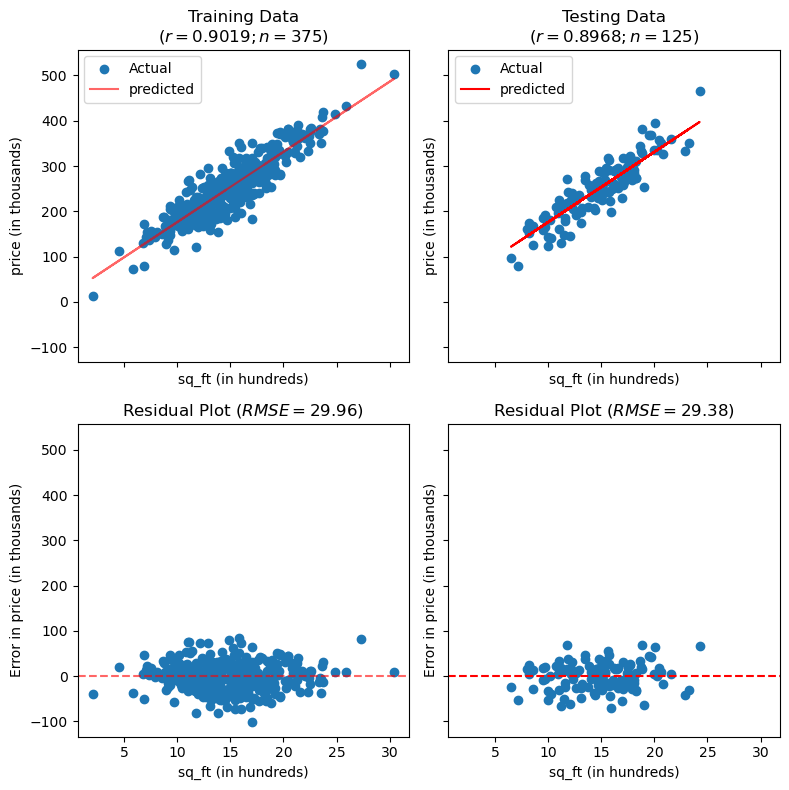

In [ ]:
test_sample_size = X_test.shape[0]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))

# Graphing Training Data

## Top left axis - Scatter plot of training data
ax[0,0].scatter(X_train, y_train, label='Actual')

## Top left axis - Linear model's trend line
ax[0,0].plot(X_train, training_predictions, color='r', label='predicted', alpha=0.6)

ax[0,0].set_title(f'Training Data\n($r={train_r_value:.4f}; n={train_sample_size})$')
ax[0,0].set_xlabel(x_label)
ax[0,0].set_ylabel(y_label)
ax[0,0].legend()

## Bottom left axis - Scatter plot of training residuals
ax[1,0].scatter(X_train, training_residuals, label='Actual')

## Bottom left axis - Horizontal Line representing zero residual
ax[1,0].axhline(0, color='r', linestyle='--', alpha=0.6)

ax[1,0].set_xlabel(x_label)
ax[1,0].set_ylabel(f'Error in {y_label}')
ax[1,0].set_title(f'Residual Plot ($RMSE={training_rmse:.2f})$')

# Graphing Testing Data

## Top right axis - Scatter plot of testing data
ax[0,1].scatter(X_test, y_test, label='Actual')

## Top right axis - Linear model's trend line
ax[0,1].plot(X_test, test_predictions, color='r', label='predicted')

ax[0,1].set_title(f'Testing Data\n($r={test_r_value:.4f}; n={test_sample_size})$')
ax[0,1].set_xlabel(x_label)
ax[0,1].set_ylabel(y_label)
ax[0,1].legend()

## Bottom right axis - Scatter plot of testing residuals
ax[1,1].scatter(X_test, test_residuals, label='Actual')

## Bottom right axis - Horizontal line representing zero residual
ax[1,1].axhline(0, color='r', linestyle='--')

ax[1,1].set_title(f'Residual Plot ($RMSE={testing_rmse:.2f})$')
ax[1,1].set_xlabel(x_label)
ax[1,1].set_ylabel(f'Error in {y_label}')

plt.tight_layout()

Visually, the performance between both models appears similar, which is in line with what was seen in the performance metrics.  

# Conclusion

By visualizing the dataset and seeing the linear trend and because we wanted to predict a quantitative output, linear regression was a reasonable choice to make.  Evaluating the model's performance on training and testing data produced similar results, giving confidence that the model will be able to do well on new and unseen data.  

In general, it's quite difficult to get the model right on the first try.  Had the linear regression model performed poorly, it wouldn't have been the end of the world.  Instead, one would have to go back to the drawing board, try a different model, and evaluate its performance.